<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

_Material adapted from its original author, Joseph Nelson_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

**To get full credit, each code cell must be accompanied by another cell giving plain-English interpretations as if you were speaking to a non-data scientist.**

---

## Basic Level

### Part 1: Read in the data.
Print the head of the data.

_Hint:_ This is a TSV (tab-separated value) file, which means each element of the table is separated by a tab (instead of a `,` or `|` like we've seen in class).

_Hint 2:_ The unicode character for tab is `\t`

In [1]:
DATA_FILE = './data/chipotle.tsv'
import numpy as np
import pandas as pd

In [3]:
chipolte = pd.read_csv('./data/chipotle.tsv', sep='\t')

### Part 2: Whare the top 5 most commonly ordered items?

In [4]:
# Group the orders by item_name and count of the order_ids for each (number of orders, not quantity).
top_orders = chipolte.groupby(['item_name'])['order_id'].count()

# Sorted the order groupings from highest to lowest & printed out the first (top) 5.
top_orders.sort_values(axis=0, inplace=True, ascending=False)
print('The 5 most commonly ordered items and how many times they were ordered are:\n', top_orders.head(5))

The 5 most commonly ordered items and how many times they were ordered are:
 item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: order_id, dtype: int64


### My Explanation ###
I grouped all of the items and then counted up how many times each was ordered. 
Listed above are the top 5 with how many times each was ordered which were (in this order):  
Chicken Bowl, Chicken Burrito, Chips and Guacamole, Steak Burrito and Canned Soft Drink.

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

_Hint:_ Examine the data to see if the `quantity` column is relevant to this calculation.

_Hint 2:_ String methods can be called via `str`. For example, you might find the following useful:

```python
data.variable.str.replace('xyz', 'abc')
```

_Hint 3:_ Pay close attention to data types here! This is tricky.

In [13]:
# Reload in the original chipolte dataframe.
chipolte = pd.read_csv('./data/chipotle.tsv', sep='\t')

# Remove the $ in the item_price column & convert it to a float.
chipolte['item_price'] = chipolte['item_price'].str.replace('$','')  
chipolte['item_price'] = chipolte['item_price'].astype(float)

# item_price already accounts for the quantity of each item per order, so it doesn't need to be multiplied.
# Groupby the order_id and sum up the total price per order.
order_price = chipolte.groupby('order_id')['item_price'].sum()

# Print out the mean of the order price
print('The average price of a Chipolte order is:', order_price.mean())

print('This is rounded to show only dollars and cents and is: $', str(round(order_price.mean(), 2)))

The average price of a Chipolte order is: 18.81142857142869
This is rounded to show only dollars and cents and is: $ 18.81


### My Explanation ###
In order to calculate the average price of an order:
* I had to change the information in the item_price column to a "number" (the inclusion of the dollar sign prevented it from being recognized as a number). So I first removed the dollar sign and then converted the information in the column to a "float" (which is a number that can have decimal values). 
* I looked over these values and realized that the item price already accounted for the price of multiple quantities per order, so I didn't have to account for that.  
* Thus, I just had to group the item_price for each order and sum up the total price of each of the different items for an order.  
* Finally I found the mean for the price of all the orders, and rounded the average value to show only the first 2 decimal places.

The average price of an order is $18.81. 

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for items with `item_name` `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`. You're being asked about the variety of sodas in the `choice_description` column.

In [179]:
# Filter the chipolte table for item_names that include 'Canned Soda' or 'Canned Soft Drink', then save the choice_description column to a new DataFrame.
sodas = chipolte['choice_description'][chipolte['item_name'].str.contains('Canned Soda' or 'Canned Soft Drink')]

# Create a list of items that are unique and print them out.
unique_sodas = sodas.unique()
print("Here's your set of unique sodas and soft drinks:\n", unique_sodas)

Here's your set of unique sodas and soft drinks:
 ['[Sprite]' '[Dr. Pepper]' '[Mountain Dew]' '[Diet Dr. Pepper]'
 '[Coca Cola]' '[Diet Coke]']


### My Explanation ###
I filtered the datasest to include only the rows which contained, in the choice_description cell, either Canned Soda or Canned Soft Drink.
Then I created a list of "unique" items, getting rid of the redundancy.
Finally, I saved that a new set called "unique_sodas", as requested.

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [161]:
# Create a new column to include the number of toppings for an item.
chipolte['num_toppings'] = (chipolte.choice_description.str.count(',')+1)
# Filter chipolte table for burrito rows. 
burrito_data = chipolte.loc[chipolte['item_name'].str.contains('Burrito')]

# Quick calculation of the mean for the num_toppings column (as requested above).
print('As requested above to not take into account multiple quantities per order: \n the average number of toppings per burrito is:', burrito_data['num_toppings'].mean())

# Validation - by calculating another way
#print('\nTo validate this, the number of orders with burritos in them is:', burrito_data['quantity'].count(), "\nand the total number of toppings (not accounting for 'quantity') is:", burrito_data['num_toppings'].sum())
#print('the number of total toppings divided by the number of burrito orders is:', burrito_data['num_toppings'].sum()/burrito_data['quantity'].count())
#print('which matches the quick calculation above.')

As requested above to not take into account multiple quantities per order: 
 the average number of toppings per burrito is: 5.395051194539249


### My Explanation ###
In each row's 'choice_description' there is a list of toppings with commas in between. Counting up the commas and adding "1" to it (since the last term does not have a trailing comma) will indicate the number of toppings listed in the cell.
I created a new column to store this data called 'num_toppings'.
Then, I filtered the entire table to keep only the rows which contained the term "Burrito" in the "item_name" column and saved it in a new DataFrame called "burrito_data".
Finally, I found the mean of the number of toppings in the "burrito_data"'s new 'num_toppings' column and found this to be about 5.4 toppings.

However, as suggested above in the instructions...the above is actually wrong AND, if this was an actual contracted deliverable, I'd have to counsel against using it.

....so I really tried (unsuccessfully) to solve it as shown below.

In [198]:
# I know....I know....you told me to ignore this....
# BUT IT IS INCORRECT WITHOUT IT!
# So, I created another new column to the original chipolte file above, # to include the number of toppings
# while accounting for multiple quantities of each item with the listed toppings.
chipolte['qnum_toppings'] = (chipolte['num_toppings']*chipolte['quantity'])

# Filter chipolte table for burrito rows (which include both columns described above). 
burrito_data = chipolte.loc[chipolte['item_name'].str.contains('Burrito')]

#print(chipolte[['quantity','num_toppings','qnum_toppings']])
print('In attempting to factor in the quantity column which includes a few cells of multiple quantities per order...\nI found the total number of toppings is', burrito_data['qnum_toppings'].sum(), ', but it should be 7310.\nAlthough the total number of burrito orders is', burrito_data['quantity'].count(), ', the total number of burritos is', burrito_data['quantity'].sum(), '.\nSo, if I divide the total number of toppings by the total number of burritos,\nthis represents the average number of toppings per burrito.\nHowever, with the incorrect qnum_topping value, the average calculates to:', burrito_data['qnum_toppings'].sum()/burrito_data['quantity'].sum(), ',\nwhich really should be 5.69363. (argh!  but this is probably why you told us not to do this....)')

In attempting to factor in the quantity column which includes a few cells of multiple quantities per order...
I found the total number of toppings is 6616.0 , but it should be 7310.
Although the total number of burrito orders is 1172 , the total number of burritos is 1231 .
So, if I divide the total number of toppings by the total number of burritos,
this represents the average number of toppings per burrito.
However, with the incorrect qnum_topping value, the average calculates to: 5.374492282696995 ,
which really should be 5.69363. (argh!  but this is probably why you told us not to do this....)


### My Explanation, part 2 ###
Using the column created above with the "num_toppings" data multiplied this value by the quantity column value to obtain the total number of toppings for the burritos ordered and stored that in a column called "qnum_toppings" (num_toppings accounting for the quality values).
As before, I filtered the entire table to keep only the rows whcih contained the term "Burrito" in the "item_name" column and saved it in a new DataFrame called "burrito_data".
To obtain the average number of toppings, I summed up the "qnum_toppings" and divided that by the total number of burritos (sum of the 'quantity' column).

Finally, I found the mean of the number of toppings in the "burrito_data"'s new 'num_toppings' column and found this to be about 5.4 toppings.
This is less than not including the quantity as calculated above.

So in exploring the data (see below), I discovered that the qnum_toppings value is incorrect.
'Have no idea why....but the actual value is calculated below.

In [199]:
# How I found the 5.69363 value - which should be the correct one. 
grouped_burrito_data = burrito_data.groupby(['quantity'])
print(grouped_burrito_data.order_id.count())
print(grouped_burrito_data.qnum_toppings.mean())

# now multiply each row....groupby quantity * sum of orders * qnum_toppings = 7310
# then divide by the total number of burritos (7310/1231) = 5.69363

quantity
1    1122
2      43
3       5
4       2
Name: order_id, dtype: int64
quantity
1     5.412656
2    10.139535
3    12.600000
4    22.000000
Name: qnum_toppings, dtype: float64


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [181]:
# Filter chipolte table for chip rows. 
chip_data = chipolte.loc[chipolte['item_name'].str.contains('Chips')]

# Group chip orders, sum up the quantities, and convert to a dictionary, then print it.
chip_dict = dict(chip_data.groupby('item_name')['quantity'].sum())
print("Here's the dictionary for chip-related orders paired with total number of orders:\n", chip_dict)

Here's the dictionary for chip-related orders paired with total number of orders:
 {'Chips': 230, 'Chips and Fresh Tomato Salsa': 130, 'Chips and Guacamole': 506, 'Chips and Mild Fresh Tomato Salsa': 1, 'Chips and Roasted Chili Corn Salsa': 23, 'Chips and Roasted Chili-Corn Salsa': 18, 'Chips and Tomatillo Green Chili Salsa': 45, 'Chips and Tomatillo Red Chili Salsa': 50, 'Chips and Tomatillo-Green Chili Salsa': 33, 'Chips and Tomatillo-Red Chili Salsa': 25, 'Side of Chips': 110}


### My Explanation ###
I filtered the data to include only the rows which contained, in the item_name cell, the term "Chips". This includes all variations and combinations of Chips with and without other items.
I then grouped these Chips-containing items, summed them up including the quantity which may have been more than one per order. 
Finally, I converted the names and the total orders of each Chips-containing item to a key-value pair - stored as a dictionary set called "chip_data".

### Part 7: Create a barplot of the frequencies of the chip orders from part 6.

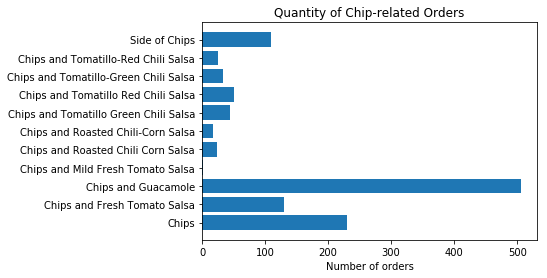

In [143]:
import matplotlib.pyplot as plt

# Create a horizontal bar plot to display the dictionary keys (barh=easier to read the names) and values created in Part 6.
plt.barh(range(len(chip_dict)), list(chip_dict.values()), align='center')
plt.yticks(range(len(chip_dict)), list(chip_dict.keys()))
plt.title('Quantity of Chip-related Orders')
plt.xlabel('Number of orders')
plt.show()

### My Explanation ###
I created a horizontal bar plot to display the number of orders for each Chip-related item stored in the dictionary described in Part 6.
The horizontal bar plot makes the long names of each of the items easier to read and compare to the length of the bar (representing the number of orders shown on the X-axis).

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


### My Explanation ###
I decided to figure out what the cheapest and most expensive Chipolte orders were....and then to figure out what items were actually ordered. I created a dictionary of key-value pairs for each order grouped by "order_id" with their summed item_prices to represent each order's cost.  
Then, I searched through this dictionary to find the least expensive/cheapest/minimum value for the order cost and correlated the order_id with the values for quantity and item_name in the order.
I did a similar function, but searched for the most expensive/maximum value for the order costs and found the quantities and item_names that correspond to the this order_id.
The order_id, cost and items purchased are shown below:

In [183]:
# Create a dictionary for grouped order_id and sum up the total price per order.
order_dict = dict(chipolte.groupby('order_id')['item_price'].sum())

minimum = min(order_dict, key=order_dict.get)  
print('The least expensive order was #',minimum, 'at a cost of $',order_dict[minimum], 'and included:')
print(chipolte.loc[chipolte['order_id']== minimum][['quantity','item_name']].values)
print()
maximum = max(order_dict, key=order_dict.get)  
print('The most expensive order was #',maximum, 'at a cost of $',order_dict[maximum], 'and included:')
print(chipolte.loc[chipolte['order_id']== maximum][['quantity','item_name']].values)

The least expensive order was # 14 at a cost of $ 10.08 and included:
[[1 'Carnitas Burrito']
 [1 'Canned Soda']]

The most expensive order was # 926 at a cost of $ 205.25 and included:
[[1 'Steak Burrito']
 [1 'Chicken Bowl']
 [1 'Chicken Bowl']
 [1 'Chicken Bowl']
 [1 'Steak Bowl']
 [1 'Chicken Bowl']
 [1 'Steak Burrito']
 [1 'Chicken Burrito']
 [1 'Chicken Bowl']
 [1 'Chicken Bowl']
 [1 'Chicken Salad Bowl']
 [1 'Steak Bowl']
 [1 'Chicken Burrito']
 [1 'Steak Bowl']
 [1 'Chicken Bowl']
 [1 'Steak Bowl']
 [1 'Chicken Burrito']
 [1 'Chicken Bowl']
 [1 'Chicken Bowl']
 [1 'Barbacoa Burrito']
 [1 'Chicken Burrito']
 [1 'Steak Bowl']
 [1 'Veggie Bowl']]
